<a href="https://colab.research.google.com/github/deepthikanna/ML_Naive_01/blob/main/NaiveBayes1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data_frame=pd.read_csv("pimadataorig.csv")

In [ ]:
data_frame.shape

(768, 9)

In [ ]:
data_frame.head(5)

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data_frame.tail(5)

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
print(data_frame.isnull().values.any())

False


In [ ]:
def plot_corr(data_frame,size=11):
  corr=data_frame.corr()
  fig, ax=plt.subplots(figsize=(size,size))
  ax.matshow(corr)
  plt.xticks(range(len(corr.columns)),corr.columns)
  plt.xticks(range(len(corr.columns)),corr.columns)


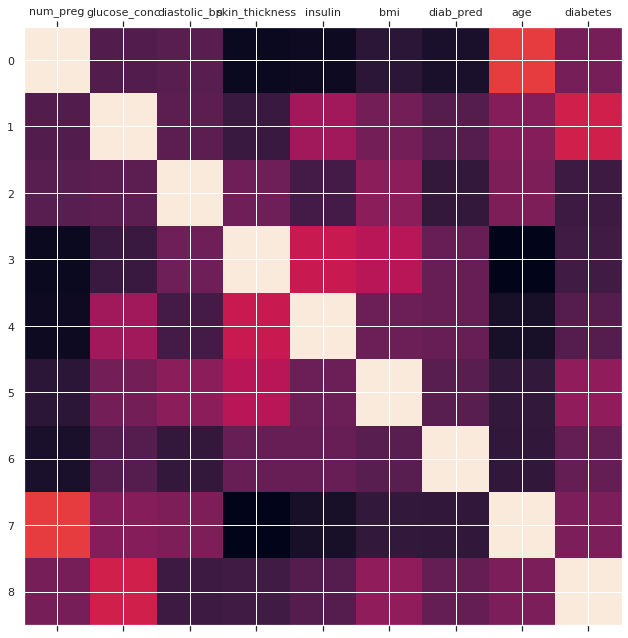

In [ ]:
plot_corr(data_frame)

In [ ]:
data_frame.corr()

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
diabetes_map={True : 1, False : 0}
data_frame['diabetes']=data_frame['diabetes'].map(diabetes_map)

In [ ]:
data_frame.head(5)
print(type(data_frame['diabetes']))

<class 'pandas.core.series.Series'>


In [ ]:
num_obs=len(data_frame)
num_true=len(data_frame.loc[data_frame['diabetes']==1])
num_false=len(data_frame.loc[data_frame['diabetes']==0])
print(num_obs)
print(num_true,(num_true/num_obs)*100,"%")
print(num_false,(num_false/num_obs)*100,"%")
print("Number of true cases : {0} ({1:2.2f}%) ".format(num_true, ((1.00 * num_true)/(1.0 * num_obs)) * 100))
print("Number of false cases : {0} ({1:2.2f}%) ".format(num_false, ((1.0 * num_false)/(1.0 * num_obs)) * 100))

768
268 34.89583333333333 %
500 65.10416666666666 %
Number of true cases : 268 (34.90%) 
Number of false cases : 500 (65.10%) 


In [ ]:
from sklearn.model_selection import train_test_split
feature_col_names=['num_preg','glucose_conc','diastolic_bp','skin_thickness','insulin','bmi','diab_pred','age']
predicted_class_names=['diabetes']
x=data_frame[feature_col_names].values
y=data_frame[predicted_class_names].values
split_test_size=0.30
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=split_test_size,random_state=42)

In [ ]:
#To check the correctness of splitting
trainval=(1.0 * len(x_train)/(1.0 * len(data_frame.index)))
testval=(len(x_test))/(len(data_frame.index))
print(trainval)
print(testval)
print('{0:0.2f}% in training set '.format((trainval)*100))
print('{0:0.2f}% in testing set '.format((testval)*100))

0.69921875
0.30078125
69.92% in training set 
30.08% in testing set 


In [ ]:
print("Test true :  {0}({1:0.2f}%)".format(len(y_test[y_test[:]==1]),len(y_test[y_test[:]==1])/len(y_test)*100.0))
print("Test true :  {0}({1:0.2f}%)".format(len(y_test[y_test[:]==0]),len(y_test[y_test[:]==0])/len(y_test)*100.0))

Test true :  80(34.63%)
Test true :  151(65.37%)


In [ ]:
#How many rows having unexpected zero values
print("Rows in dataframe {0} ".format(len(data_frame)))
print("Rows missing glucose concentration {0} ".format(len(data_frame.loc[data_frame['glucose_conc']==0])))
print("Rows missing diastolic blood pressure {0} ".format(len(data_frame.loc[data_frame['diastolic_bp']==0])))
print("Rows missing Insulin {0} ".format(len(data_frame.loc[data_frame['insulin']==0])))
print("Rows missing bmi {0} ".format(len(data_frame.loc[data_frame['bmi']==0])))
print("Rows missing diab_pred {0} ".format(len(data_frame.loc[data_frame['diab_pred']==0])))
print("Rows missing age {0} ".format(len(data_frame.loc[data_frame['age']==0])))

Rows in dataframe 768 
Rows missing glucose concentration 5 
Rows missing diastolic blood pressure 35 
Rows missing Insulin 374 
Rows missing bmi 11 
Rows missing diab_pred 0 
Rows missing age 0 


In [ ]:
#Impute with the mean
from sklearn.impute import SimpleImputer
fill_0=SimpleImputer(missing_values=0,strategy='mean')
x_train=fill_0.fit_transform(x_train)
x_test=fill_0.fit_transform(x_test)

In [ ]:
data_frame_imputed=data_frame['bmi'].fill(0)(data_frame.mean())


AttributeError: ignored

In [ ]:
#Naive-Bayes Algorithm
from sklearn.naive_bayes import GaussianNB

#import Gausian Naive Bayes model object and train with the data

nb_model=GaussianNB()
nb_model.fit(x_train,y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Performance on Training data

In [ ]:
#This returns array of predicted results
prediction_from_trained_data=nb_model.predict(x_train)

from sklearn import metrics
accuracy=metrics.accuracy_score(y_train,prediction_from_trained_data)
print("Accuracy of Naive Bayes Model : {0:0.4f}" .format(accuracy))

Accuracy of Naive Bayes Model : 0.7542


In [ ]:
#Performance on Testing data

In [ ]:
prediction_from_testing_data=nb_model.predict(x_test)
accuracy=metrics.accuracy_score(y_test,prediction_from_testing_data)
print("Accuracy of Naive Bayes Model : {0:0.4f}" .format(accuracy))

Accuracy of Naive Bayes Model : 0.7359


In [ ]:
print("Confusion Matrix ")

#labels for set 1=True to upper left and 0=False to lower right

print("{0}".format(metrics.confusion_matrix(y_test,prediction_from_testing_data,labels=[1,0])))

Confusion Matrix 
[[ 52  28]
 [ 33 118]]


In [ ]:
print("Classification Report ")

##labels for set 1=True to upper left and 0=False to lower right

print("{0}".format(metrics.classification_report(y_test,prediction_from_testing_data,labels=[1,0])))

Classification Report 
              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           0       0.81      0.78      0.79       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231

